In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy.stats.stats import pearsonr
import pandas as pd
import seaborn as sns

# Get Data

In [2]:
data_array = pd.read_csv('Churn_Modelling.csv',delimiter=',')

In [3]:
data_array

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,3,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [4]:
del data_array["RowNumber"]
del data_array["Surname"]
del data_array["CustomerId"]
data_array

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,3,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


# Distribution of data

In [5]:
variables=["CreditScore", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

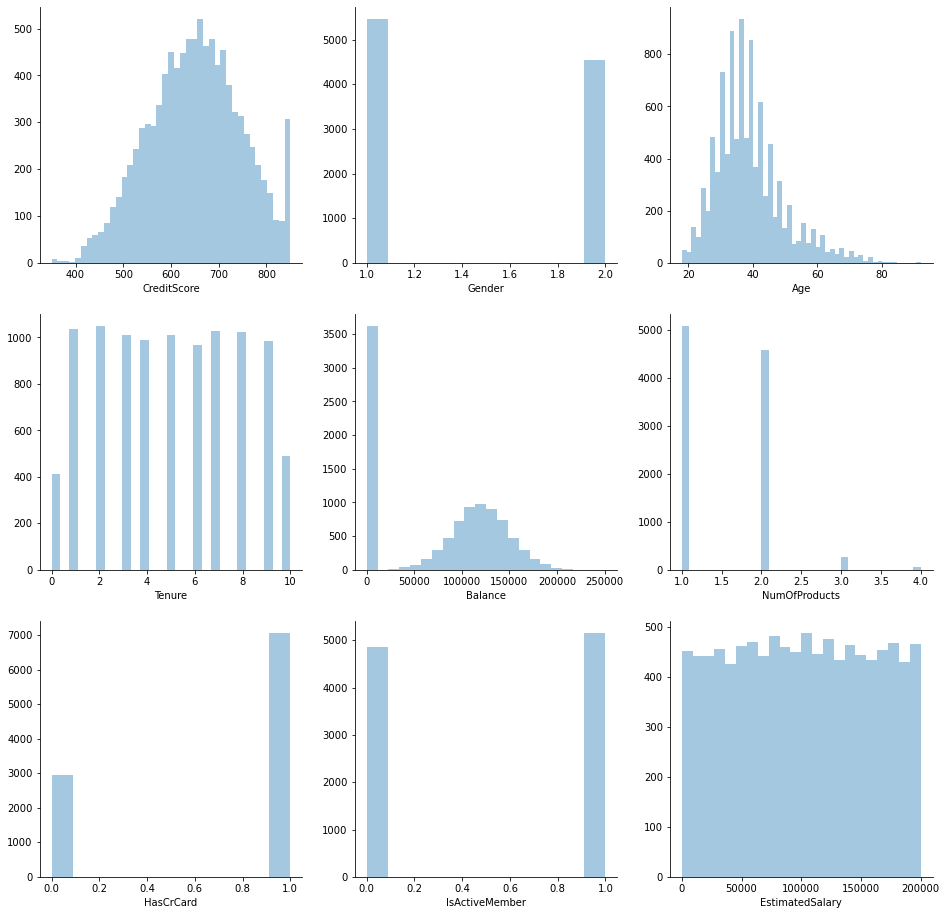

In [6]:
fig, ax = plt.subplots(figsize=(16,16))
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    x=data_array[variables[i]]
    sns.distplot(x, kde=False)
    sns.despine()

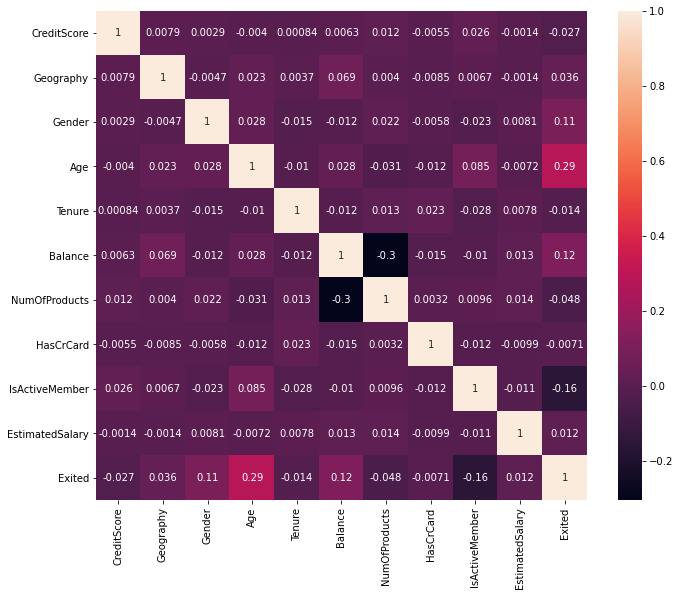

Exited             1.000000
Age                0.285323
Balance            0.118533
Gender             0.106512
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [7]:
fig, ax = plt.subplots(figsize=(11,9))
correl = data_array.corr()
sns.heatmap(correl,annot=True)
plt.show()
correl["Exited"].sort_values(ascending=False)

# Scale

In [8]:
scaler = StandardScaler()
data_array[variables] = scaler.fit_transform(data_array[variables])
data_array

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,1,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,3,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,1,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,1,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,3,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,-0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0
9996,-1.391939,1,-0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0
9997,0.604988,1,1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1
9998,1.256835,2,-0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1


# Learning and predicting

In [9]:
data_without_y = data_array.copy()
del data_without_y["Exited"]
del data_without_y["HasCrCard"]
del data_without_y["Tenure"]
del data_without_y["EstimatedSalary"]
del data_without_y["CreditScore"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Exited'].values, 
                                                    train_size=0.5)

In [11]:
classifier = MLPClassifier(solver='sgd', hidden_layer_sizes=(20), max_iter=1000).fit(x_train,y_train)
y_pred=classifier.predict(x_test)
pd.DataFrame({"true":y_test, "pred":y_pred})

,true,pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
4995,0,0
4996,0,0
4997,1,1
4998,0,0


In [12]:
accuracy_score(y_test, y_pred)

0.8562